In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [156]:
df = pd.read_csv('US Hospital Expenditures.csv', index_col=0)

In [157]:
df.dropna()
df.head()

,Year,Total,Out of Pocket,Health Insurance,Pvt Health Ins,Medicare,Medicaid,Other Ins Prgm,3rd Party Payers
US Hospital Exp.,,,,,,,,,
1970's data,1970-01,27.2,2.4,19.4,8.8,5.4,2.6,2.6,5.3
1980's data,1980-01,100.5,5.4,80.1,36.8,26.3,9.2,7.8,15.0
1990's data,1990-01,250.4,11.2,206.9,96.5,67.4,26.7,16.3,32.4
2000 data,2000-01,415.5,13.4,358.2,141.0,123.4,70.9,22.9,43.9
2001 data,2001-01,449.4,13.8,390.7,153.4,135.0,77.4,24.9,44.8


In [158]:
df.shape

(20, 9)

In [159]:
df.columns.values

array(['Year', 'Total', 'Out of Pocket', 'Health Insurance',
       'Pvt Health Ins', 'Medicare', 'Medicaid', 'Other Ins Prgm',
       '3rd Party Payers'], dtype=object)

In [160]:
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month

In [161]:
df.index

DatetimeIndex(['1970-01-01', '1980-01-01', '1990-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

## SAMPLING OF OVERALL HOSPITAL EXPENDITURE USING OUT OF POCKET VARIABLE

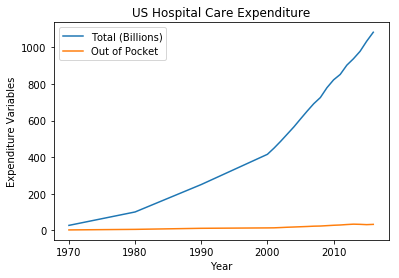

In [126]:
plt.plot(df["Year"], df["Total (Billions)"], label="Total (Billions)")
plt.plot(df["Year"], df["Out of Pocket"], label="Out of Pocket")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("US Hospital Care Expenditure")
plt.legend()
plt.show()

## To compare (by Visualization) Total Expenditure and Health Insurance to Out of Pocket and Private Health Insurance in the 1970's

In [127]:
Year_1970_df = df[df.Year == 1970]

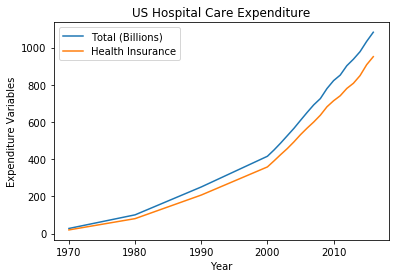

In [128]:
plt.plot(df["Year"], df["Total (Billions)"], label="Total (Billions)")
plt.plot(df["Year"], df["Health Insurance"], label="Health Insurance")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("US Hospital Care Expenditure")
plt.legend()
plt.show()

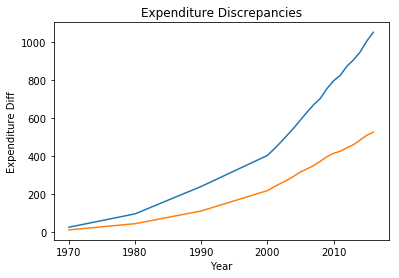

In [129]:
plt.plot(df["Year"], df["Total (Billions)"] - df["Out of Pocket"], label="Total (Billions)-Out of Pocket")
plt.plot(df["Year"], df["Health Insurance"] - df["Pvt Health Ins"], label="Health Insurance-Pvt Health Ins")
plt.xlabel("Year")
plt.ylabel("Expenditure Diff")
plt.title("Expenditure Discrepancies")
plt.show()

## To compare (by Visualization) Total Expenditure and Health Insurance to Medicare and Medicaid in the 1990's

In [130]:
Year_1990_df = df[df.Year == 1990]

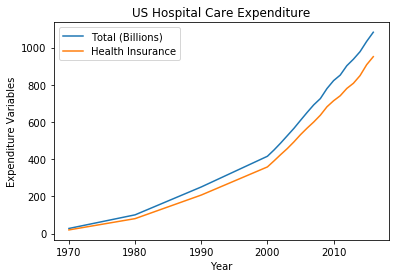

In [131]:
plt.plot(df["Year"], df["Total (Billions)"], label="Total (Billions)")
plt.plot(df["Year"], df["Health Insurance"], label="Health Insurance")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("US Hospital Care Expenditure")
plt.legend()
plt.show()

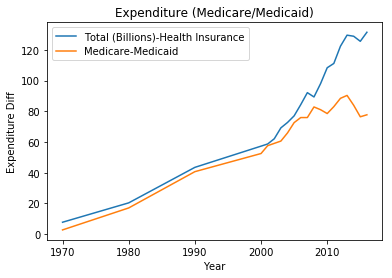

In [132]:
plt.plot(df["Year"], df["Total (Billions)"] - df["Health Insurance"], label="Total (Billions)-Health Insurance")
plt.plot(df["Year"], df["Medicare"] - df["Medicaid"], label="Medicare-Medicaid")
plt.xlabel("Year")
plt.ylabel("Expenditure Diff")
plt.title("Expenditure (Medicare/Medicaid)")
plt.legend()
plt.show()

## To compare Medicaid Hospital Expenditure to Other Hospital Expenditure relative to the the Total Expenditure in 2016 using boxplot

In [133]:
Year_2016_df = df[df.Year == 2016]

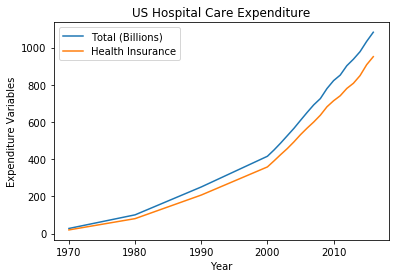

In [134]:
plt.plot(df["Year"], df["Total (Billions)"], label="Total (Billions)")
plt.plot(df["Year"], df["Health Insurance"], label="Health Insurance")
plt.xlabel("Year")
plt.ylabel("Expenditure Variables")
plt.title("US Hospital Care Expenditure")
plt.legend()
plt.show()

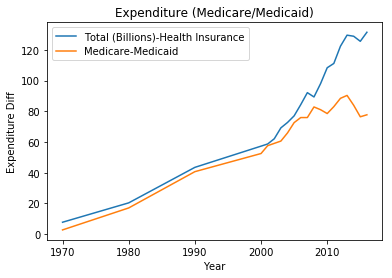

In [135]:
plt.plot(df["Year"], df["Total (Billions)"] - df["Health Insurance"], label="Total (Billions)-Health Insurance")
plt.plot(df["Year"], df["Medicare"] - df["Medicaid"], label="Medicare-Medicaid")
plt.xlabel("Year")
plt.ylabel("Expenditure Diff")
plt.title("Expenditure (Medicare/Medicaid)")
plt.legend()
plt.show()

In [136]:
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace=True)

df['Year'] = df.index.year

To measure how much the Expenditure are correlated with each other, I will compute the autocorrelation of the 'Total (Billions)' column using the autocorr function.  I will set the lag to 1 which computes the correlation between every point and the point directly preceding it.  This is so because the data is sparse.

In [117]:
df['Health Insurance'].resample('D').mean().autocorr(lag=1)

nan

## COMPUTING ROLLING AVERAGES

In [118]:
df[['Total (Billions)']].resample('A').apply(['median', 'mean']).head()

Total (Billions)         
                     median     mean
Year                                
1970-12-31           671.55  644.295